In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, sys

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [3]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [4]:
from paths import PATH_PROCESSED_CSV

In [5]:
data = pd.read_csv(PATH_PROCESSED_CSV) 

In [6]:
data

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,Price,etatCategory,...,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Bon prix,84100.0,Diesel,Professionnel,5.0,5.0,Mercedes,A 180,169005,2,...,85.0,Boîte manuelle,1461.0,8.0,1425.0,116.0,Euro 6d,Diesel,3.8,106.0
1,Bon prix,40671.0,Essence,Professionnel,5.0,5.0,Mercedes,GLA 180,179505,2,...,90.0,Boîte manuelle,1595.0,9.0,1295.0,122.0,Euro 6,Essence,5.7,133.0
2,Bon prix,69636.0,Essence,Professionnel,5.0,5.0,Mercedes,A 180,159905,2,...,90.0,Boîte manuelle,1595.0,9.0,1360.0,122.0,Euro 6b,Essence,5.2,120.0
3,Pas d'information,11998.0,Electrique/Essence,Professionnel,5.0,4.0,Mercedes,E 53 AMG,10999015,0,...,430.0,Boîte automatique,2999.0,4.0,NaN,585.0,NaN,Électrique,NaN,22.0
4,Bon prix,71300.0,Essence,Professionnel,5.0,5.0,Mercedes,GLC 250,3150015,2,...,155.0,Boîte automatique,1991.0,1.0,1805.0,211.0,Euro 6d,NaN,7.1,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,Prix correct,135061.0,Diesel,Professionnel,5.0,4.0,Volkswagen,Caddy,1999915,1,...,110.0,Boîte automatique,2000.0,1.0,1789.0,150.0,NaN,Diesel,NaN,149.0
10651,Pas d'information,44779.0,Essence,Professionnel,5.0,4.0,Volkswagen,Caddy,174905,0,...,62.0,Boîte manuelle,1197.0,6.0,1350.0,84.0,Euro 6b,Essence,6.1,139.0
10652,Prix correct,181161.0,Essence,Professionnel,5.0,5.0,Volkswagen,Tiguan,109505,1,...,118.0,Boîte manuelle,1390.0,1.0,1546.0,160.0,Euro 5,NaN,7.6,156.0
10653,Prix correct,166361.0,Diesel,Professionnel,4.0,2.0,Volkswagen,Beetle,104505,1,...,77.0,Boîte manuelle,1598.0,7.0,1462.0,105.0,Euro 5,Diesel,4.7,124.0


## 1 -  Copy the data

In [7]:
data2 = data.copy()

## 2 - feature engineering

In [8]:
from datetime import datetime

current_year = datetime.now().year
data2['CarAge'] = current_year - data2['Year']

In [9]:
X_02=data2[['Carburant', 'Typedecarburant', 'Cylindrée', 'Consommationdecarburant',
               'Puissance', 'HorsePower', 'seats', 'Portes', 'ÉmissionsdeCO2', 
               'Year', 'CarAge']]
Y_02= data2['Price']  # Target variable

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_02, Y_02, test_size=0.2, random_state=42)

In [26]:
numurical_features_2=[ 'Cylindrée', 'Consommationdecarburant',
               'Puissance', 'HorsePower', 'seats', 'Portes', 'ÉmissionsdeCO2', 
               'Year', 'CarAge']
categorical_features_2=['Typedecarburant','Carburant']

In [27]:
data2[numurical_features_2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cylindrée                9844 non-null   float64
 1   Consommationdecarburant  6413 non-null   float64
 2   Puissance                10603 non-null  float64
 3   HorsePower               10608 non-null  float64
 4   seats                    10235 non-null  float64
 5   Portes                   9964 non-null   float64
 6   ÉmissionsdeCO2           7565 non-null   float64
 7   Year                     10380 non-null  float64
 8   CarAge                   10380 non-null  float64
dtypes: float64(9)
memory usage: 749.3 KB


In [28]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numurical_features_2),
        ('cat', categorical_transformer, categorical_features_2)])

In [30]:
# Create and evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Plot feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = model[:-1].get_feature_names_out()
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance, y=feature_names)
        plt.title('Feature Importance')
        plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# Option 1: XGBoost with Hyperparameter Tuning
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=20, n_jobs=-1))])

xgb_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
print("\nXGBoost Best Parameters:", xgb_grid.best_params_)
evaluate_model(best_xgb, X_test, y_test)


XGBoost Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}
Model Performance:
MSE: 8078874902528.00
RMSE: 2842336.17
MAE: 985164.19
R²: 0.67


In [ ]:

# Option 2: Random Forest (alternative)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))])

rf_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, 
                      scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("\nRandom Forest Best Parameters:", rf_grid.best_params_)
evaluate_model(best_rf, X_test, y_test)


In [10]:
#data2["Age_Mileage_Ratio"] = data2["CarAge"] / data2["Milieage"]
#data2["Power_Weight_Ratio"] = data2["HorsePower"] / data2["Cylindrée"]
#data2["Fuel_Efficiency_Score"] = data2["HorsePower"] / data2["Consommationdecarburant"]
#data2["Emission_per_HP"] = data2["ÉmissionsdeCO2"] / data2["HorsePower"]

In [111]:
# Try creating new features that might be more predictive
data2['Power_to_Weight'] = data2['Puissance'] / data2['Cylindrée']
data2['Fuel_Efficiency'] = data2['Cylindrée'] / data2['Consommationdecarburant']
data2['Age_Squared'] = data2['CarAge'] ** 2

In [9]:
data2

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,Price,etatCategory,...,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge
0,Bon prix,84100.0,Diesel,Professionnel,5.0,5.0,Mercedes,A 180,169005,2,...,Boîte manuelle,1461.0,8.0,1425.0,116.0,Euro 6d,Diesel,3.8,106.0,6.0
1,Bon prix,40671.0,Essence,Professionnel,5.0,5.0,Mercedes,GLA 180,179505,2,...,Boîte manuelle,1595.0,9.0,1295.0,122.0,Euro 6,Essence,5.7,133.0,8.0
2,Bon prix,69636.0,Essence,Professionnel,5.0,5.0,Mercedes,A 180,159905,2,...,Boîte manuelle,1595.0,9.0,1360.0,122.0,Euro 6b,Essence,5.2,120.0,7.0
3,Pas d'information,11998.0,Electrique/Essence,Professionnel,5.0,4.0,Mercedes,E 53 AMG,10999015,0,...,Boîte automatique,2999.0,4.0,NaN,585.0,NaN,Électrique,NaN,22.0,1.0
4,Bon prix,71300.0,Essence,Professionnel,5.0,5.0,Mercedes,GLC 250,3150015,2,...,Boîte automatique,1991.0,1.0,1805.0,211.0,Euro 6d,NaN,7.1,162.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,Prix correct,135061.0,Diesel,Professionnel,5.0,4.0,Volkswagen,Caddy,1999915,1,...,Boîte automatique,2000.0,1.0,1789.0,150.0,NaN,Diesel,NaN,149.0,7.0
10651,Pas d'information,44779.0,Essence,Professionnel,5.0,4.0,Volkswagen,Caddy,174905,0,...,Boîte manuelle,1197.0,6.0,1350.0,84.0,Euro 6b,Essence,6.1,139.0,6.0
10652,Prix correct,181161.0,Essence,Professionnel,5.0,5.0,Volkswagen,Tiguan,109505,1,...,Boîte manuelle,1390.0,1.0,1546.0,160.0,Euro 5,NaN,7.6,156.0,10.0
10653,Prix correct,166361.0,Diesel,Professionnel,4.0,2.0,Volkswagen,Beetle,104505,1,...,Boîte manuelle,1598.0,7.0,1462.0,105.0,Euro 5,Diesel,4.7,124.0,11.0


In [10]:
data2.describe(include = "all")

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,Price,etatCategory,...,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge
count,10655,1.061100e+04,10655,10655,9964.000000,10235.000000,10655,10613,1.065500e+04,10655.000000,...,10221,9844.000000,10627.000000,7440.000000,10608.000000,7900,9706,6413.000000,7565.000000,10380.000000
unique,4,NaN,9,2,NaN,NaN,43,713,NaN,NaN,...,2,NaN,NaN,NaN,NaN,10,3,NaN,NaN,NaN
top,Pas d'information,NaN,Essence,Professionnel,NaN,NaN,Volkswagen,Polo,NaN,NaN,...,Boîte manuelle,NaN,NaN,NaN,NaN,Euro 6d,Essence,NaN,NaN,NaN
freq,3198,NaN,6541,8317,NaN,NaN,1235,467,NaN,NaN,...,5757,NaN,NaN,NaN,NaN,3153,6201,NaN,NaN,NaN
mean,NaN,8.199328e+04,NaN,NaN,4.678643,4.363361,NaN,NaN,1.461844e+06,1.333271,...,NaN,1771.591528,4.487908,1619.479435,165.526301,NaN,NaN,5.787260,128.042829,8.423988
std,NaN,6.804044e+04,NaN,NaN,0.959222,1.060495,NaN,NaN,4.722002e+06,1.098558,...,NaN,960.403766,3.062791,800.641415,124.033426,NaN,NaN,2.381026,69.332322,7.947117
min,NaN,0.000000e+00,NaN,NaN,1.000000,2.000000,NaN,NaN,1.000000e+00,0.000000,...,NaN,0.000000,1.000000,980.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,3.145700e+04,NaN,NaN,5.000000,4.000000,NaN,NaN,4.500500e+04,0.000000,...,NaN,1199.000000,1.000000,1190.000000,101.000000,NaN,NaN,4.600000,106.000000,4.000000
50%,NaN,7.000000e+04,NaN,NaN,5.000000,5.000000,NaN,NaN,1.695050e+05,1.000000,...,NaN,1498.000000,5.000000,1395.000000,131.000000,NaN,NaN,5.300000,125.000000,6.000000
75%,NaN,1.190000e+05,NaN,NaN,5.000000,5.000000,NaN,NaN,1.749015e+06,2.000000,...,NaN,1984.000000,7.000000,1641.250000,165.000000,NaN,NaN,6.300000,147.000000,11.000000


<Axes: >

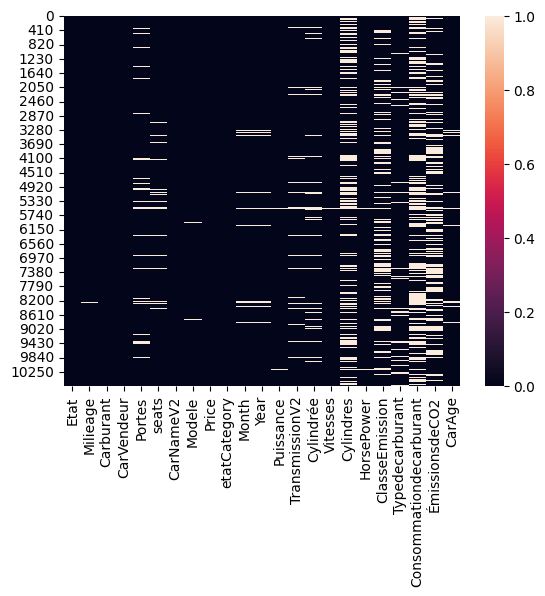

In [11]:
sns.heatmap(data2.isna())

In [12]:
(data2.isna().sum() / data2.shape[0]) * 100

Etat                        0.000000
Milieage                    0.412952
Carburant                   0.000000
CarVendeur                  0.000000
Portes                      6.485218
seats                       3.941811
CarNameV2                   0.000000
Modele                      0.394181
Price                       0.000000
etatCategory                0.000000
Month                       2.580948
Year                        2.580948
Puissance                   0.488034
TransmissionV2              4.073205
Cylindrée                   7.611450
Vitesses                    0.262787
Cylindres                  30.173627
HorsePower                  0.441107
ClasseEmission             25.856405
Typedecarburant             8.906617
Consommationdecarburant    39.812295
ÉmissionsdeCO2             29.000469
CarAge                      2.580948
dtype: float64

* Consommationdecarburant and Cylindres have mny nan values

In [92]:
#data2.replace([np.inf, -np.inf], np.nan,inplace=True)

In [13]:
categorie_columns = data2.select_dtypes(exclude = np.number).columns
number_columns    = data2.select_dtypes(include = np.number).columns

In [14]:
data[categorie_columns]

,Etat,Carburant,CarVendeur,CarNameV2,Modele,TransmissionV2,ClasseEmission,Typedecarburant
0,Bon prix,Diesel,Professionnel,Mercedes,A 180,Boîte manuelle,Euro 6d,Diesel
1,Bon prix,Essence,Professionnel,Mercedes,GLA 180,Boîte manuelle,Euro 6,Essence
2,Bon prix,Essence,Professionnel,Mercedes,A 180,Boîte manuelle,Euro 6b,Essence
3,Pas d'information,Electrique/Essence,Professionnel,Mercedes,E 53 AMG,Boîte automatique,NaN,Électrique
4,Bon prix,Essence,Professionnel,Mercedes,GLC 250,Boîte automatique,Euro 6d,NaN
...,...,...,...,...,...,...,...,...
10650,Prix correct,Diesel,Professionnel,Volkswagen,Caddy,Boîte automatique,NaN,Diesel
10651,Pas d'information,Essence,Professionnel,Volkswagen,Caddy,Boîte manuelle,Euro 6b,Essence
10652,Prix correct,Essence,Professionnel,Volkswagen,Tiguan,Boîte manuelle,Euro 5,NaN
10653,Prix correct,Diesel,Professionnel,Volkswagen,Beetle,Boîte manuelle,Euro 5,Diesel


In [15]:
number_columns

Index(['Milieage', 'Portes', 'seats', 'Price', 'etatCategory', 'Month', 'Year',
       'Puissance', 'Cylindrée', 'Vitesses', 'Cylindres', 'HorsePower',
       'Consommationdecarburant', 'ÉmissionsdeCO2', 'CarAge'],
      dtype='object')

In [16]:
data2[number_columns].astype(np.float64)

,Milieage,Portes,seats,Price,etatCategory,Month,Year,Puissance,Cylindrée,Vitesses,Cylindres,HorsePower,Consommationdecarburant,ÉmissionsdeCO2,CarAge
0,84100.0,5.0,5.0,169005.0,2.0,9.0,2019.0,85.0,1461.0,8.0,1425.0,116.0,3.8,106.0,6.0
1,40671.0,5.0,5.0,179505.0,2.0,3.0,2017.0,90.0,1595.0,9.0,1295.0,122.0,5.7,133.0,8.0
2,69636.0,5.0,5.0,159905.0,2.0,7.0,2018.0,90.0,1595.0,9.0,1360.0,122.0,5.2,120.0,7.0
3,11998.0,5.0,4.0,10999015.0,0.0,7.0,2024.0,430.0,2999.0,4.0,NaN,585.0,NaN,22.0,1.0
4,71300.0,5.0,5.0,3150015.0,2.0,8.0,2019.0,155.0,1991.0,1.0,1805.0,211.0,7.1,162.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,135061.0,5.0,4.0,1999915.0,1.0,11.0,2018.0,110.0,2000.0,1.0,1789.0,150.0,NaN,149.0,7.0
10651,44779.0,5.0,4.0,174905.0,0.0,6.0,2019.0,62.0,1197.0,6.0,1350.0,84.0,6.1,139.0,6.0
10652,181161.0,5.0,5.0,109505.0,1.0,6.0,2015.0,118.0,1390.0,1.0,1546.0,160.0,7.6,156.0,10.0
10653,166361.0,4.0,2.0,104505.0,1.0,5.0,2014.0,77.0,1598.0,7.0,1462.0,105.0,4.7,124.0,11.0


#### check nan values for numbers  and categorical column

In [17]:
numbers_nans = list(number_columns[data2.select_dtypes(include = np.number).isna().sum() != 0])
categor_nans = list(categorie_columns[data2.select_dtypes(exclude = np.number).isna().sum() != 0])

In [18]:
numbers_nans

['Milieage',
 'Portes',
 'seats',
 'Month',
 'Year',
 'Puissance',
 'Cylindrée',
 'Vitesses',
 'Cylindres',
 'HorsePower',
 'Consommationdecarburant',
 'ÉmissionsdeCO2',
 'CarAge']

In [19]:
categor_nans

['Modele', 'TransmissionV2', 'ClasseEmission', 'Typedecarburant']

#### Function to Handle Nan Values Categories

In [21]:
def fill_missing_categorical(df, columns, strategy="mode", fill_value="missing"):
    df_filled = df.copy()
    for col in columns:
        if strategy == "mode":
            most_frequent = df_filled[col].mode()[0] 
            df_filled[col] = df_filled[col].fillna(most_frequent)
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value)
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mode' ou 'constant'.")
    return df_filled

#### Function to Handle Nan Values Numerical

In [22]:
def fill_missing_numerical(df_filled, columns, strategy="mean", fill_value=0):
    df_filled.loc[:, columns] = df_filled[columns].replace([np.inf, -np.inf], np.nan)
    for col in columns:
        if strategy == "mean":
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())  
        elif strategy == "median":
            df_filled[col] = df_filled[col].fillna(df_filled[col].median())  
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value) 
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mean', 'median' ou 'constant'.")
    return df_filled

In [23]:
def transform_columns(df, transformer, columns):
    df_transformed = df.copy()
    for col in columns:
        if isinstance(transformer, OneHotEncoder):
            enc = OneHotEncoder(drop='first', sparse_output=False)
            transformed = enc.fit_transform(df_transformed[[col]])
            encoded_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out([col]))
            df_transformed = df_transformed.drop(columns=[col]).join(encoded_df)
        elif isinstance(transformer, LabelEncoder):
            enc = LabelEncoder()
            df_transformed[col] = enc.fit_transform(df_transformed[col])
    return df_transformed

In [24]:
from sklearn.preprocessing import MinMaxScaler
def normalize_numerical(df, columns, method="robust"):
    from sklearn.preprocessing import RobustScaler
    df_normalized = df.copy()
    if method == "standard":
        scaler = StandardScaler()  
    elif method == "minmax":
        scaler = MinMaxScaler()  
    elif method == "robust":
        scaler = RobustScaler()  
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'standard', 'minmax' ou 'robust'.")
 
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    return df_normalized

In [25]:
df = fill_missing_numerical(data2, numbers_nans)
df = fill_missing_categorical(data2, categor_nans)

In [26]:
df = normalize_numerical(df, number_columns)
df = transform_columns(data2, LabelEncoder(), categorie_columns)

In [27]:
df.isna().sum()

Etat                       0
Milieage                   0
Carburant                  0
CarVendeur                 0
Portes                     0
seats                      0
CarNameV2                  0
Modele                     0
Price                      0
etatCategory               0
Month                      0
Year                       0
Puissance                  0
TransmissionV2             0
Cylindrée                  0
Vitesses                   0
Cylindres                  0
HorsePower                 0
ClasseEmission             0
Typedecarburant            0
Consommationdecarburant    0
ÉmissionsdeCO2             0
CarAge                     0
dtype: int64

In [28]:
df.head()

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,Price,etatCategory,...,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge
0,0,84100.0,3,1,5.0,5.0,26,95,169005,2,...,1,1461.0,8.0,1425.000000,116.0,8,0,3.80000,106.0,6.0
1,0,40671.0,7,1,5.0,5.0,26,345,179505,2,...,1,1595.0,9.0,1295.000000,122.0,5,1,5.70000,133.0,8.0
2,0,69636.0,7,1,5.0,5.0,26,95,159905,2,...,1,1595.0,9.0,1360.000000,122.0,6,1,5.20000,120.0,7.0
3,1,11998.0,6,1,5.0,4.0,26,297,10999015,0,...,0,2999.0,4.0,1619.479435,585.0,10,2,5.78726,22.0,1.0
4,0,71300.0,7,1,5.0,5.0,26,354,3150015,2,...,0,1991.0,1.0,1805.000000,211.0,8,3,7.10000,162.0,6.0


<Axes: >

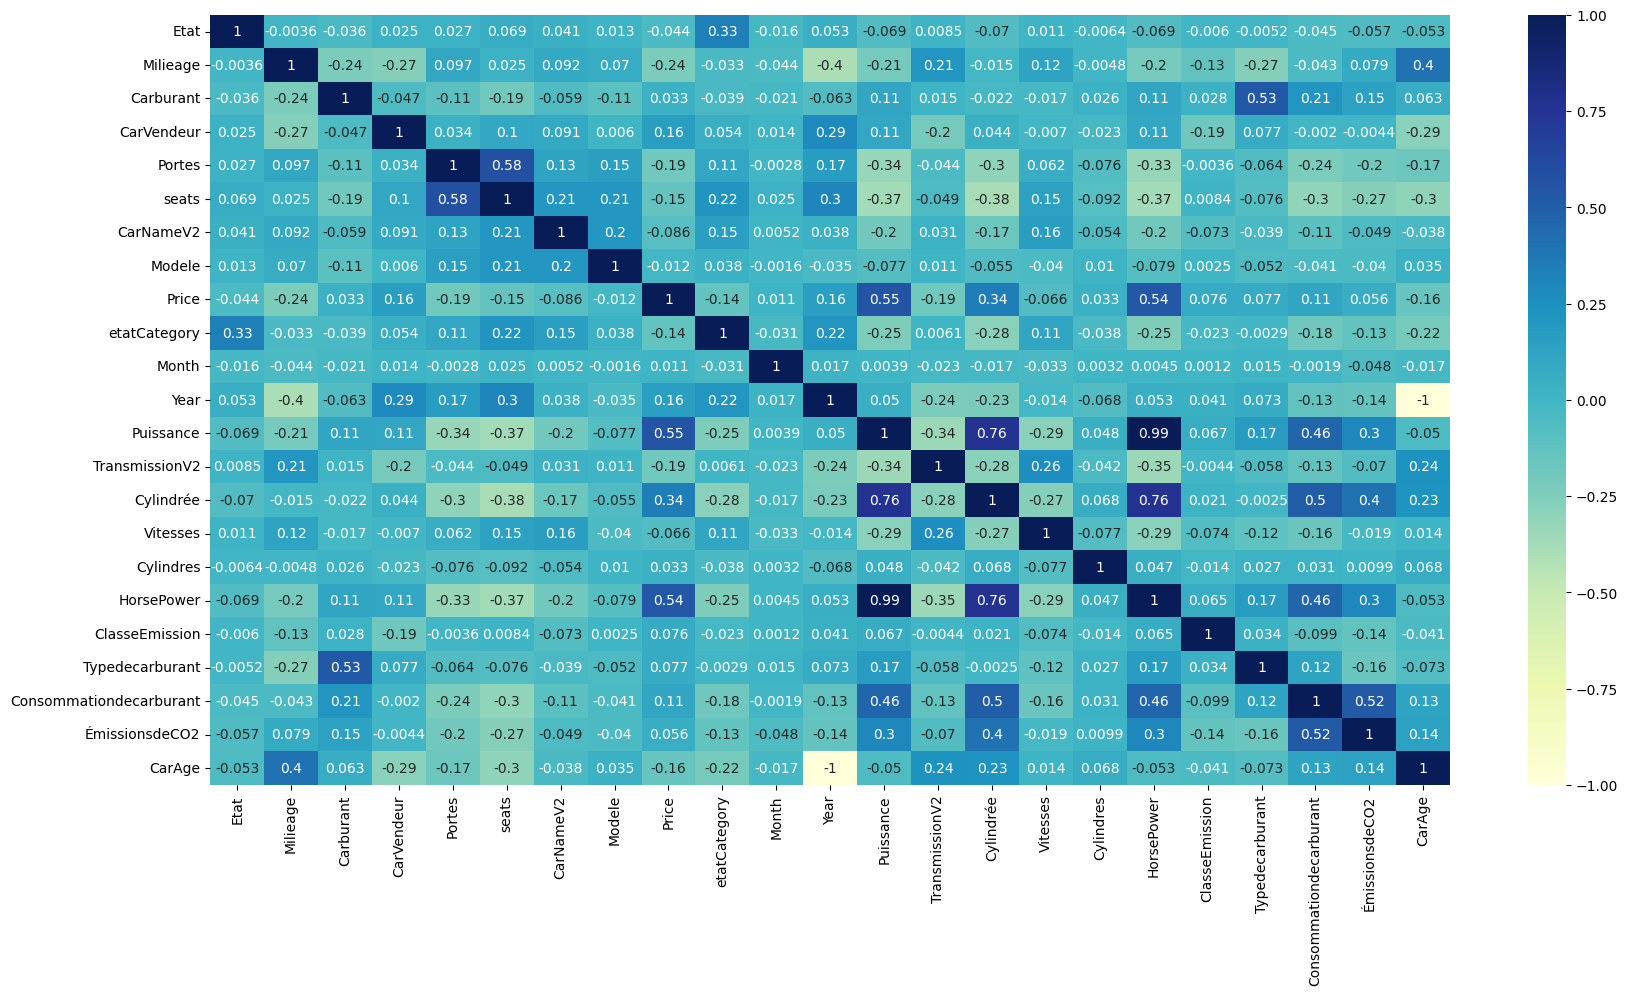

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
# or   df.corr()

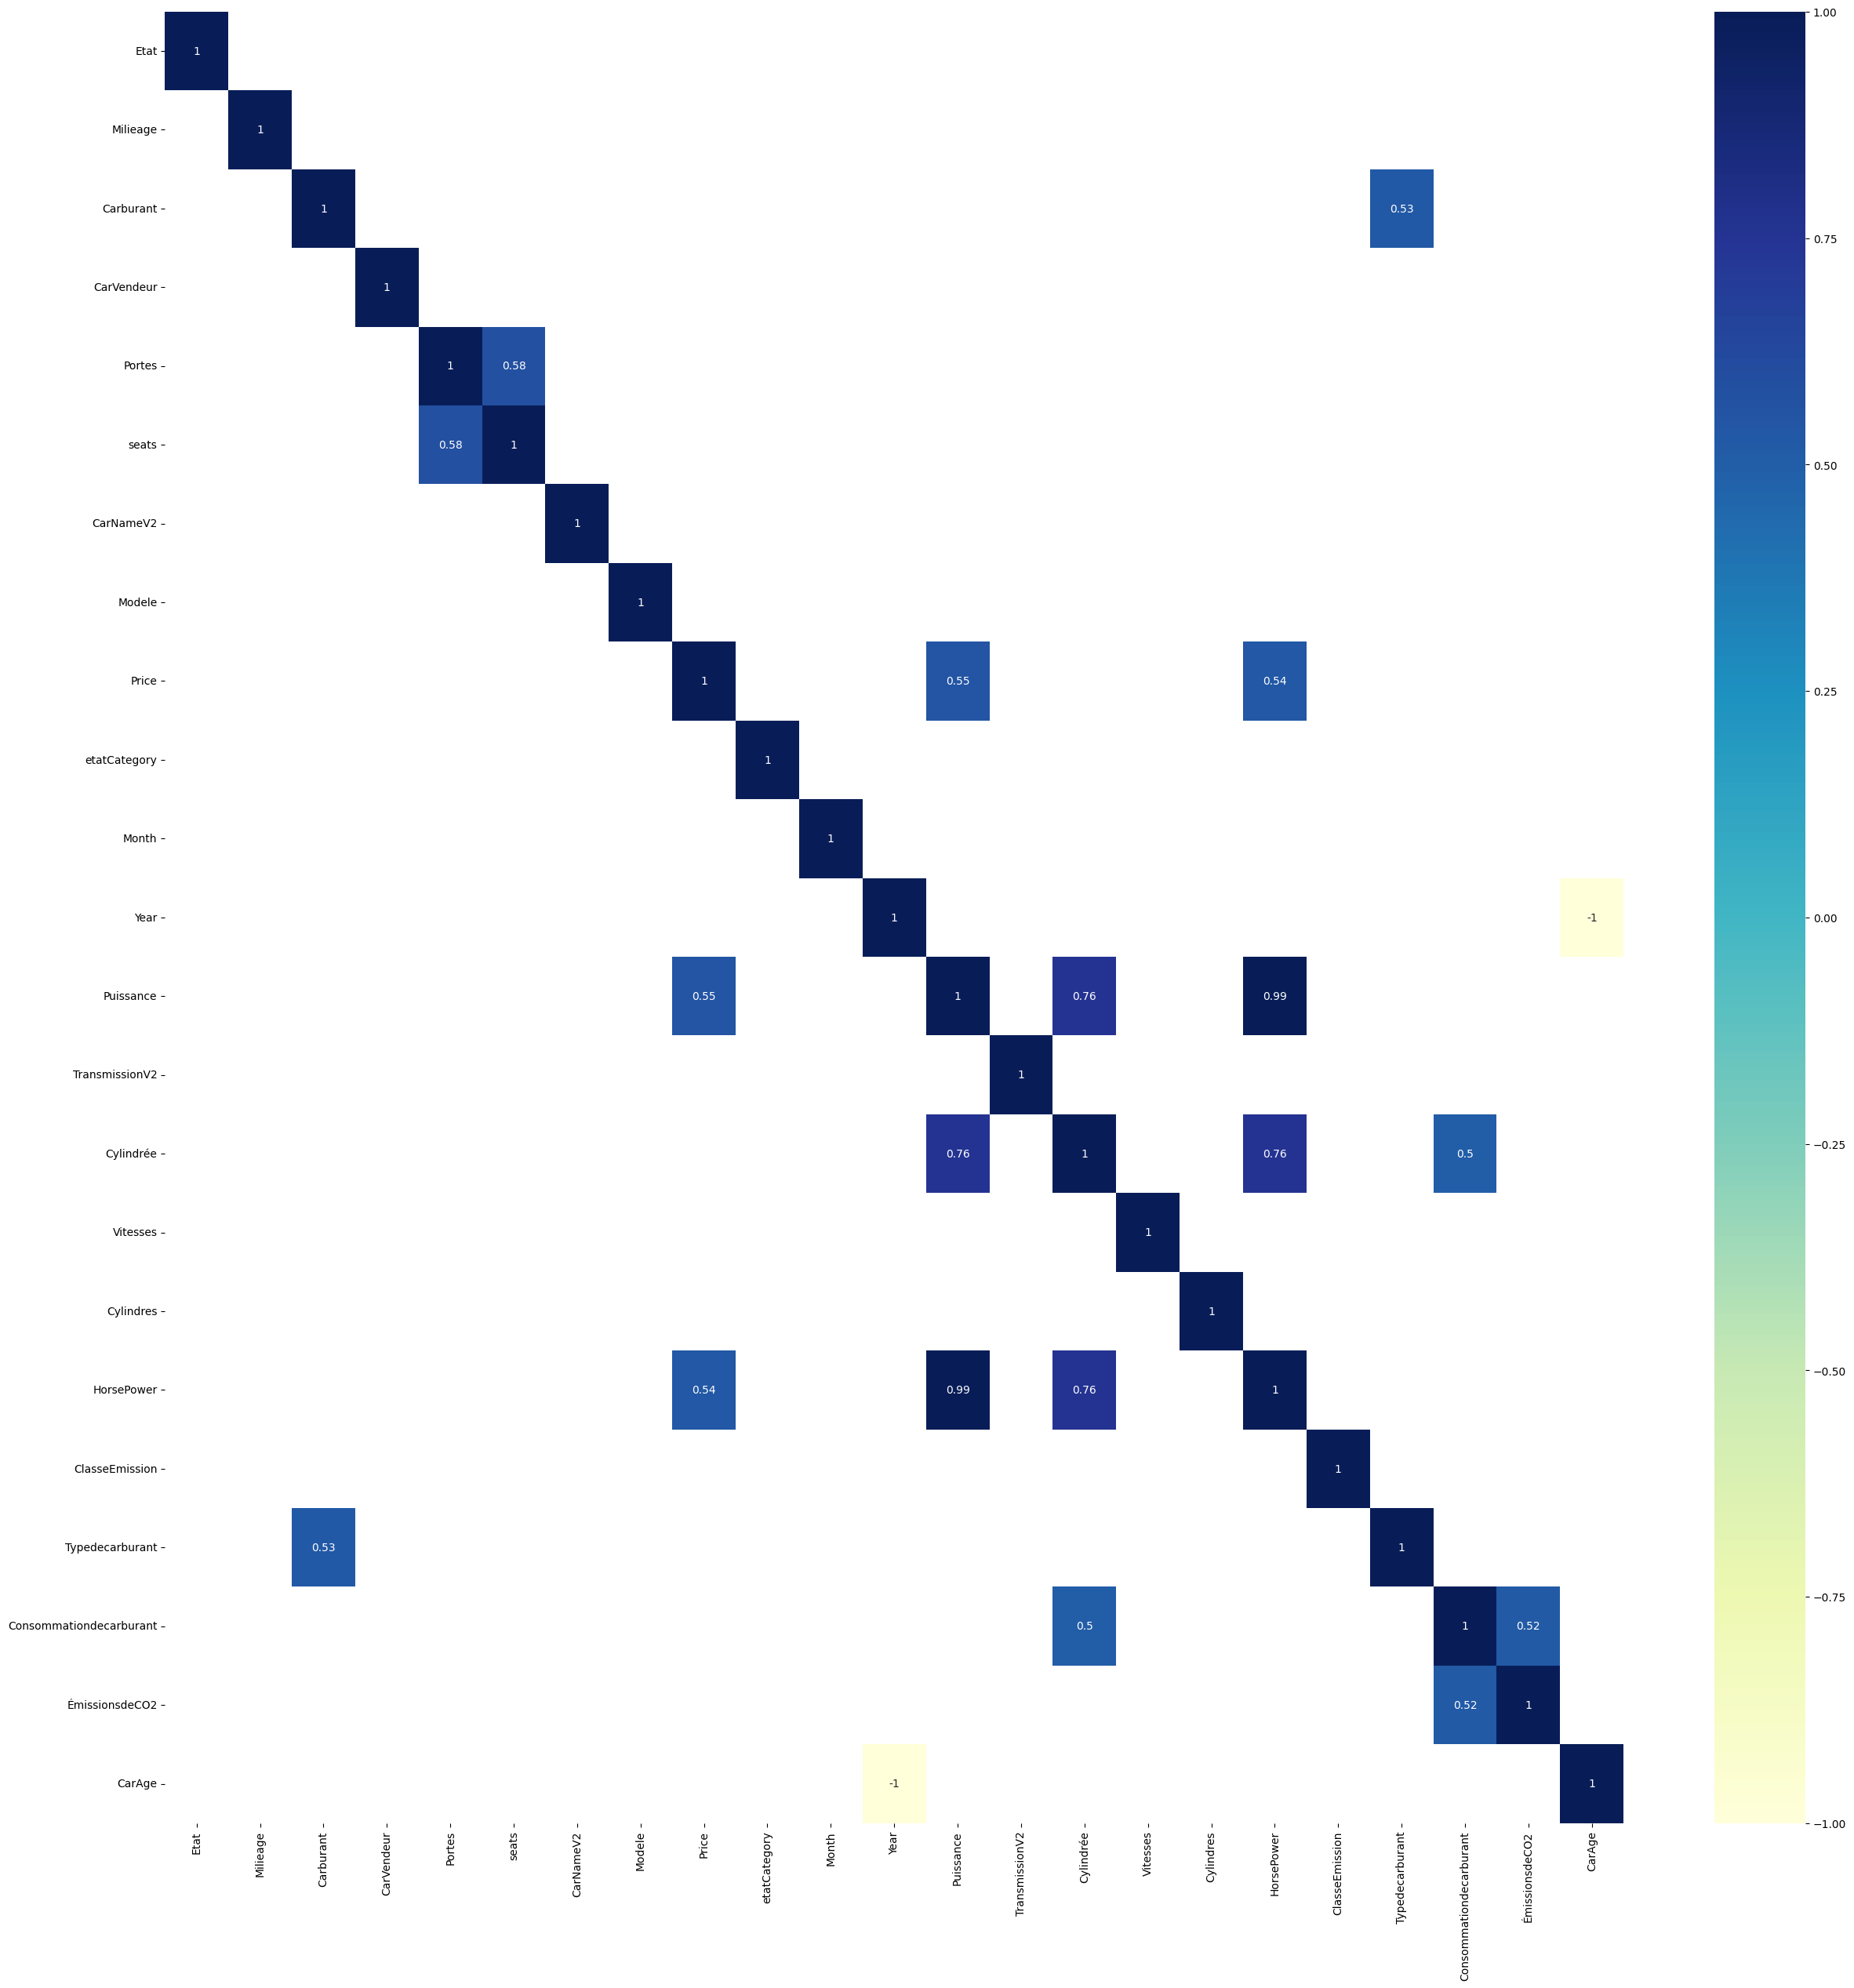

In [30]:
# Compute correlation matrix
corr_matrix = df.corr()

# Mask values where correlation is below 0.5 (absolute value)
filtered_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(filtered_corr, annot=True, cmap="YlGnBu", #vmin=-1, vmax=1, center=0)
)
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Etat                     10655 non-null  int32  
 1   Milieage                 10655 non-null  float64
 2   Carburant                10655 non-null  int32  
 3   CarVendeur               10655 non-null  int32  
 4   Portes                   10655 non-null  float64
 5   seats                    10655 non-null  float64
 6   CarNameV2                10655 non-null  int32  
 7   Modele                   10655 non-null  int32  
 8   Price                    10655 non-null  int64  
 9   etatCategory             10655 non-null  int64  
 10  Month                    10655 non-null  float64
 11  Year                     10655 non-null  float64
 12  Puissance                10655 non-null  float64
 13  TransmissionV2           10655 non-null  int32  
 14  Cylindrée             

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [100]:
Y_01 = df['Price']  # Target variable
X_01 = df[['Carburant', 'Typedecarburant', 'Cylindrée', 'Consommationdecarburant',
               'Puissance', 'HorsePower', 'seats', 'Portes', 'ÉmissionsdeCO2', 
               'Year', 'CarAge']]


In [101]:
best_features= SelectKBest(score_func=chi2, k=5)
fit= best_features.fit(X_01,Y_01)

In [102]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X_01.columns)

In [103]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
9,Year,1.962243e+02
7,Portes,1.019222e+03
6,seats,1.332794e+03
0,Carburant,2.098536e+03
1,Typedecarburant,2.769860e+03
3,Consommationdecarburant,3.802858e+03
10,CarAge,4.697313e+04
8,ÉmissionsdeCO2,1.616692e+05
4,Puissance,6.586170e+05
5,HorsePower,8.883880e+05


In [105]:
# Initialize and train regression model
regressor = Ridge()  # or LinearRegression()
regressor.fit(X_train, y_train)
# Predict and evaluate
y_pred = regressor.predict(X_test)

print("Test Features:")
print(X_test.head())
print("\nPredictions:")
print(y_pred[:5])  # first 5 predictions

# Regression metrics
print(f"\nR² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

Test Features:
         Year    Portes     seats
982    2022.0  5.000000  5.000000
557    2018.0  5.000000  3.000000
10068  2018.0  5.000000  5.000000
9269   2011.0  5.000000  5.000000
6929   2012.0  4.678643  4.363361

Predictions:
[1554484.97145137 2022576.50431123 1057526.20364156  187848.35997438
  914518.7740095 ]

R² Score: 0.10
MAE: 1797032.60


In [89]:
X_02= df[['Year', 'Portes', 'seats']]  #the top 3 features
Y_02= df[['Price']] # the target output

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_02,Y_02,test_size=0.4,random_state=100)

In [92]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [93]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) 

         Year    Portes     seats
982    2022.0  5.000000  5.000000
557    2018.0  5.000000  3.000000
10068  2018.0  5.000000  5.000000
9269   2011.0  5.000000  5.000000
6929   2012.0  4.678643  4.363361
...       ...       ...       ...
4400   2019.0  7.000000  5.000000
3108   2024.0  6.000000  6.000000
3057   2023.0  3.000000  3.000000
944    2011.0  4.000000  5.000000
8250   2022.0  5.000000  5.000000

[4262 rows x 3 columns]
[ 139905  179905  139905 ...    7500 2299015  139905]


In [98]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("CL Report:",metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.004223369310183012


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Assuming data is already loaded into a DataFrame called df
target = df['Price']  # Target variable

features = df[['Carburant', 'Typedecarburant', 'Cylindrée', 'Consommationdecarburant',
               'Puissance', 'HorsePower', 'seats', 'Portes', 'ÉmissionsdeCO2', 
               'Year', 'CarAge']]

X = features
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost model
xgb = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=10, subsample=0.3, colsample_bytree=0.9, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'XGBoost Model R^2 Score: {r2:.4f}')


XGBoost Model R^2 Score: 0.7279


#### Split data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
train_data=X_train.join(y_train)

In [43]:
train_data

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,etatCategory,Month,...,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge,Price
3032,0,0.585677,7,1,6.223610,0.000000,31,51,0.5,-0.833333,...,-0.414601,0.666667,0.073849,0.000000,5,1,0.000000,-0.349688,0.142857,159805
4870,3,0.194550,7,0,0.000000,0.000000,30,128,1.0,-0.833333,...,-0.185950,0.166667,-1.101124,-0.640625,10,1,0.455053,0.780747,1.428571,3200
2858,2,-0.388895,7,1,0.000000,0.000000,31,27,0.0,-0.333333,...,-0.414601,0.666667,0.073849,0.000000,5,1,0.000000,-0.045340,-0.571429,2489015
6717,1,-0.041393,3,1,0.000000,-1.000000,1,564,-0.5,-0.833333,...,0.887052,-0.666667,0.073849,0.453125,8,0,-1.436516,0.693790,-0.285714,289905
4913,2,-0.569208,7,1,-1.000000,0.000000,30,456,0.0,-0.833333,...,-0.185950,0.500000,0.073849,-0.171875,10,1,0.000000,0.000000,1.142857,85005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0.700496,7,1,0.000000,0.000000,27,109,0.5,-0.500000,...,0.125344,0.500000,-0.920117,-0.234375,4,1,0.164042,0.302486,1.000000,78005
5191,3,2.403268,3,0,0.000000,0.000000,30,456,1.0,-0.666667,...,-0.345730,0.333333,-0.708943,-0.562500,10,0,-2.455053,0.000000,1.000000,1600
5390,2,1.945503,3,1,0.000000,-0.636639,28,477,0.0,-0.666667,...,1.362259,-0.666667,0.073849,0.625000,3,0,0.000000,0.000000,1.714286,79005
860,0,-0.030522,7,1,-3.111805,0.000000,2,100,0.5,0.000000,...,-0.688705,0.333333,-1.387718,-0.562500,5,1,-2.309548,0.000000,0.285714,139995


#### Forst Model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0) #alpha is the regularization strength.
model.fit(X_train, y_train)

Ridge()

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 19070606982212.13
R^2 Score: 0.29035336951010005


#### RandomForestRegressor

In [60]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=14)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)

Random Forest - Mean Squared Error: 9535426440416.78
Random Forest - R^2 Score: 0.6451721096220114


#### XGBoost 

In [61]:
import xgboost as xgb


In [62]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.01, max_depth = 7, alpha = 10, n_estimators = 700)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - Mean Squared Error:", mse_xgb)

print("XGBoost - R^2 Score:", r2_xgb)
#Best Parameters: {'alpha': 15, 'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 700, 'subsample': 1}

XGBoost - Mean Squared Error: 7664238067712.0
XGBoost - R^2 Score: 0.7148019075393677


fill_missing_categorical(df, columns, strategy="mode", fill_value="missing"):
fill_missing_numerical(df_filled, columns, strategy="mean",)

-----------"minmax"

Random Forest - Mean Squared Error: 7073083466463.632
Random Forest - R^2 Score: 0.7111048893124152

XGBoost - Mean Squared Error: 6218884055040.0
XGBoost - R^2 Score: 0.7459940910339355

----------robust

Random Forest - Mean Squared Error: 7063032356787.885
Random Forest - R^2 Score: 0.7115154198053856

XGBoost - Mean Squared Error: 6218884055040.0
XGBoost - R^2 Score: 0.7459940910339355


In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd # if your data is in pandas dataframe.

# Assuming you have X (features) and y (target) ready

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter Grid
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1],
    'subsample': [0.6, 0.8, 1],
    'alpha': [5, 10, 15]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best Model
best_xg_reg = grid_search.best_estimator_

# Predictions
y_pred_xgb = best_xg_reg.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Best XGBoost - Mean Squared Error:", mse_xgb)
print("Best XGBoost - R^2 Score:", r2_xgb)
print("Best Parameters:", grid_search.best_params_)

#Example of using early stopping.
xg_reg_early = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 1000)
eval_set = [(X_test, y_test)]
xg_reg_early.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set, verbose=True)
y_pred_early = xg_reg_early.predict(X_test)
mse_early = mean_squared_error(y_test, y_pred_early)
r2_early = r2_score(y_test, y_pred_early)
print("Early Stop XGBoost - Mean Squared Error:", mse_early)
print("Early Stop XGBoost - R^2 Score:", r2_early)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

In [67]:
from sklearn.model_selection import GridSearchCV

# Try this more optimized parameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                          cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=32,
                    verbose=1)

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 20922643775488.0000 - mae: 1465632.3750 - val_loss: 22856234696704.0000 - val_mae: 1933472.2500
Epoch 2/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 19024226287616.0000 - mae: 1874255.5000 - val_loss: 22186316267520.0000 - val_mae: 1879698.0000
Epoch 3/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 20667950956544.0000 - mae: 1883076.6250 - val_loss: 21222010126336.0000 - val_mae: 1874106.8750
Epoch 4/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 15478801039360.0000 - mae: 1794192.6250 - val_loss: 20134188023808.0000 - val_mae: 1840870.6250
Epoch 5/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 15561887055872.0000 - mae: 1747188.5000 - val_loss: 19637366423552.0000 - val_mae: 1652870.1250
Epoch 6/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 23182056620032.0000 - mae: 1762827.6250 - val_loss: 19064007163904.0000 - val_mae: 1708997.3750
Epoch 7/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - los

In [71]:
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=[r_squared])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=32,
                    verbose=1)

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


NameError: name 'K' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Feature engineering
features = df[['Carburant', 'Typedecarburant', 'Cylindrée', 'Consommationdecarburant',
               'Puissance', 'HorsePower', 'seats', 'Portes', 'ÉmissionsdeCO2', 
               'Year', 'CarAge', 'Milieage', 'TransmissionV2']]

# Create interaction terms
features['Power_to_Weight'] = features['HorsePower'] / features['Cylindrée']
features['Age_Mileage_Ratio'] = features['CarAge'] / (features['Milieage'] + 1)

X = features
y = np.log1p(df['Price'])  # Log transform for skewed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimized XGBoost with grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))

print(f'Best Parameters: {grid_search.best_params_}')
print(f'XGBoost Model R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.2f}')

# Visualisation

#### XGBoost tree

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse, mse_rf, mse_xgb]  # Mean Squared Error
r2_scores = [r2, r2_rf, r2_xgb]      # R² Score

### Plotting the Mean Squared Error (MSE)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7332\3260393466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='viridis')


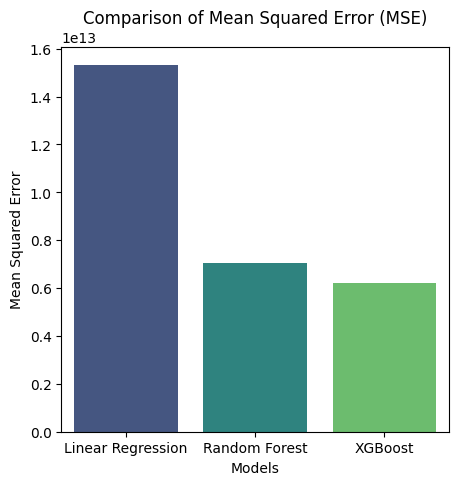

In [46]:
plt.figure(figsize=(5, 5))
sns.barplot(x=models, y=mse_scores, palette='viridis')
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

### Plotting the R² Score

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7332\794554443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


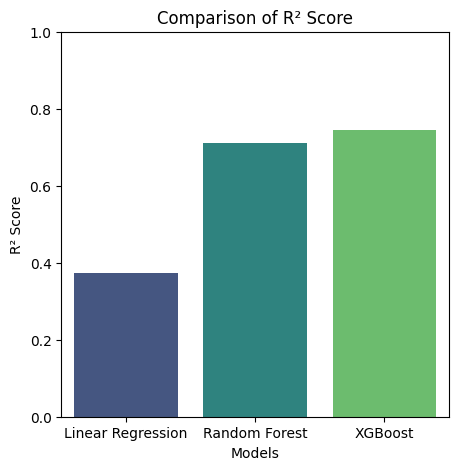

In [48]:
plt.figure(figsize=(5, 5))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('Comparison of R² Score')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.ylim(0, 1)  # R² score ranges from 0 to 1
plt.show()

### Scatter plot for actual vs predicted values

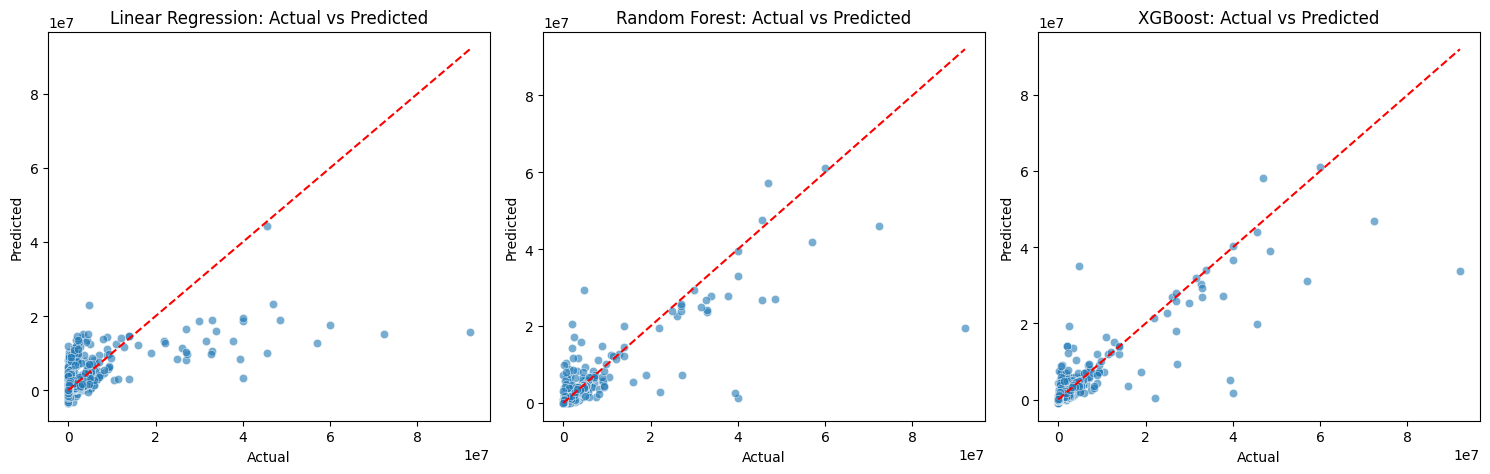

In [49]:
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# The benchmark model
model = LinearRegression()

# Baseline performance
baseline_model = model.fit(train.drop('Price', axis=1), train['Price'])
y_pred = baseline_model.predict(test.drop('Price', axis=1))
original_performance = {
    'rsq': r2_score(test['Price'], y_pred),
    'rmse': np.sqrt(mean_squared_error(test['Price'], y_pred))
}

# Features to remove
removed_features = ["Chevy", "Pontiac", "Cruise", "Leather", "Sound", "Buick", "Saturn", "wagon", "coupe"]
retained_features = [col for col in train.columns if col not in removed_features and col != 'Price']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False), ['Cylinder']),
        ('num', StandardScaler(), retained_features)
    ],
    remainder='drop'
)

# Custom transformation for Efficiency
def transform_efficiency(X):
    X = X.copy()
    X['Efficiency'] = X['Efficiency']**2
    return X

# Create complete pipeline
pipeline = Pipeline([
    ('efficiency_transform', FunctionTransformer(transform_efficiency)),
    ('preprocessor', preprocessor),
    ('feature_removal', 'passthrough'),  # Already handled by ColumnTransformer
    ('model', LinearRegression())
])

# Fit and evaluate
pipeline.fit(train.drop('Price', axis=1), train['Price'])
y_pred = pipeline.predict(test.drop('Price', axis=1))
final_performance = {
    'rsq': r2_score(test['Price'], y_pred),
    'rmse': np.sqrt(mean_squared_error(test['Price'], y_pred))
}

# Variable importance (using XGBoost as surrogate model)
importance_model = XGBRegressor()
importance_model.fit(pipeline[:-1].transform(train.drop('Price', axis=1)), train['Price'])

# Get feature names after transformations
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot importance
plt.figure(figsize=(10, 6))
pd.Series(importance_model.feature_importances_, index=feature_names).sort_values().tail(25).plot.barh()
plt.title('Top 25 Important Features')
plt.show()

# Print performances
print("Original Performance:", original_performance)
print("Final Performance:", final_performance)